<a href="https://colab.research.google.com/github/aadi0004/advanced-python/blob/main/project_(app_review_sentiment_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('linkedin-reviews.csv')
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [10]:
# Exploratory Data Analysis

In [11]:
# # we will start by analysing the distribution of ratings . It will provide insights into the overall segment of the review
# then we can explore further such as analyzing the length of reviews and possible derive insights from the yext of the reviews

In [12]:
# Plotting the distribution of ratings

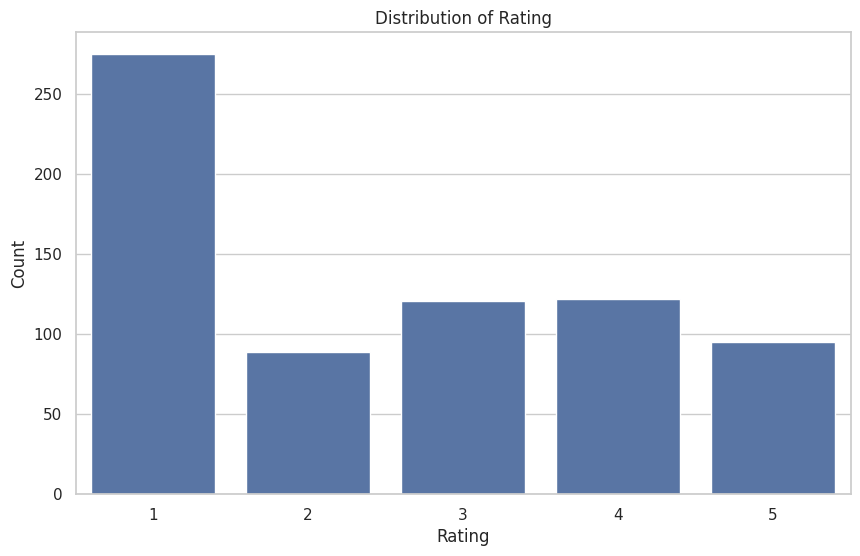

In [13]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [14]:
# # Adding sentiment lables in the data
# we will use Texblob library . textblob provides a polarity scores raning from -1 (very negative) to
# to 1(vey positive) for a given text
# we can use this score to classify each review sentiment as positive , negative, or neutral

In [15]:
! pip install textblob

In [16]:
from textblob import TextBlob

In [18]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [19]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [20]:
df.sample(5)

,Review,Rating,Sentiment
694,Yikes... Talk about losing focus on your targe...,1,Positive
142,App doesnt remember login.,4,Neutral
179,Good app,5,Positive
332,Basically it sits there refreshing for ages at...,4,Positive
567,"Updates just hang, linkedin not available",1,Negative


In [21]:
# Analyzing app Review Sentiments

In [22]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

,count
Sentiment,
Positive,298
Neutral,297
Negative,107


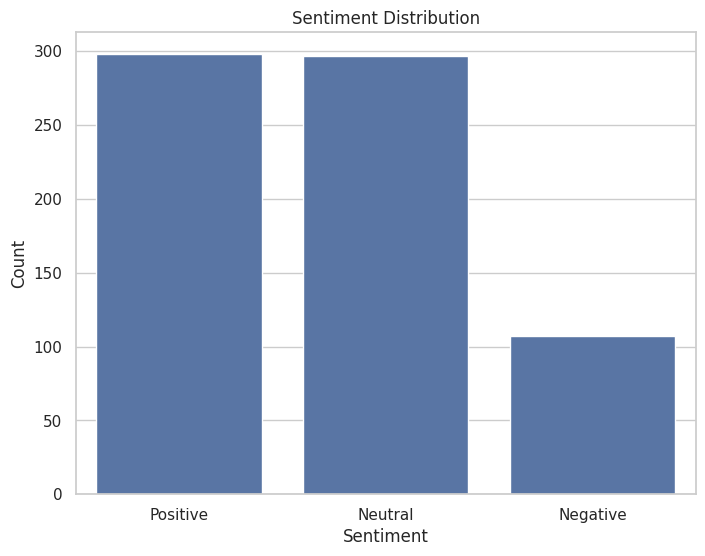

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_distribution.index,
            y=sentiment_distribution.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [26]:

# So, we can see althrough the app has low ratings, still the reviewers don't use many negative words in the reviews for the app.

# Next, we'll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there
# is a correlation between the sentiment of the text and numerical ratings.


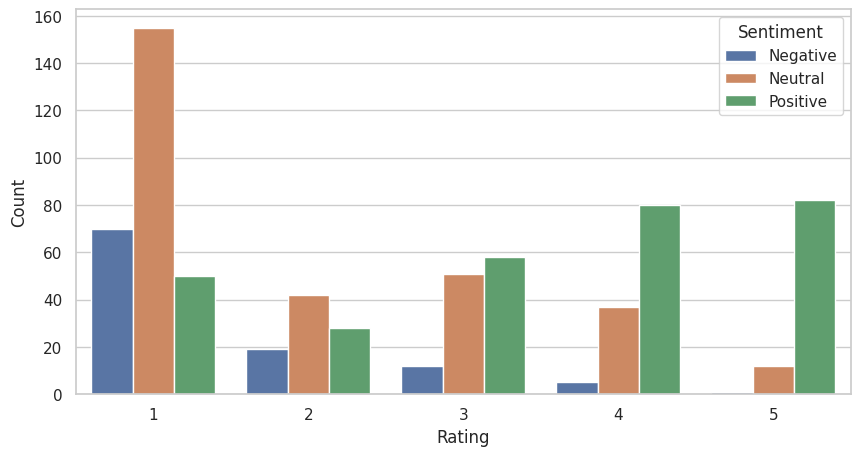

In [32]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Rating', hue='Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()
# plt.legend (title='Sentiment')
# plt.show()


In [25]:

# # Summary

# # App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand user feedback, prioritize feature updates and
# maintain a positive user community. It involves using data analysis tchniques to determine whether the sentiments in these reviews are positive,
#  negative or neutral.